In [5]:
import pandas as pd

url='https://raw.githubusercontent.com/JuanCappelletti/Consteel_H06/main/Trend280922.csv'
datos = pd.read_csv(url,sep=";",decimal=",",index_col=0)
df=pd.DataFrame(datos)
#df.info()
#print(df)
#print(df.FQI161.nlargest(n=20))
#print(df.FQI161.nsmallest(n=20),df.PIR161)
#print(df.FQI161.describe())

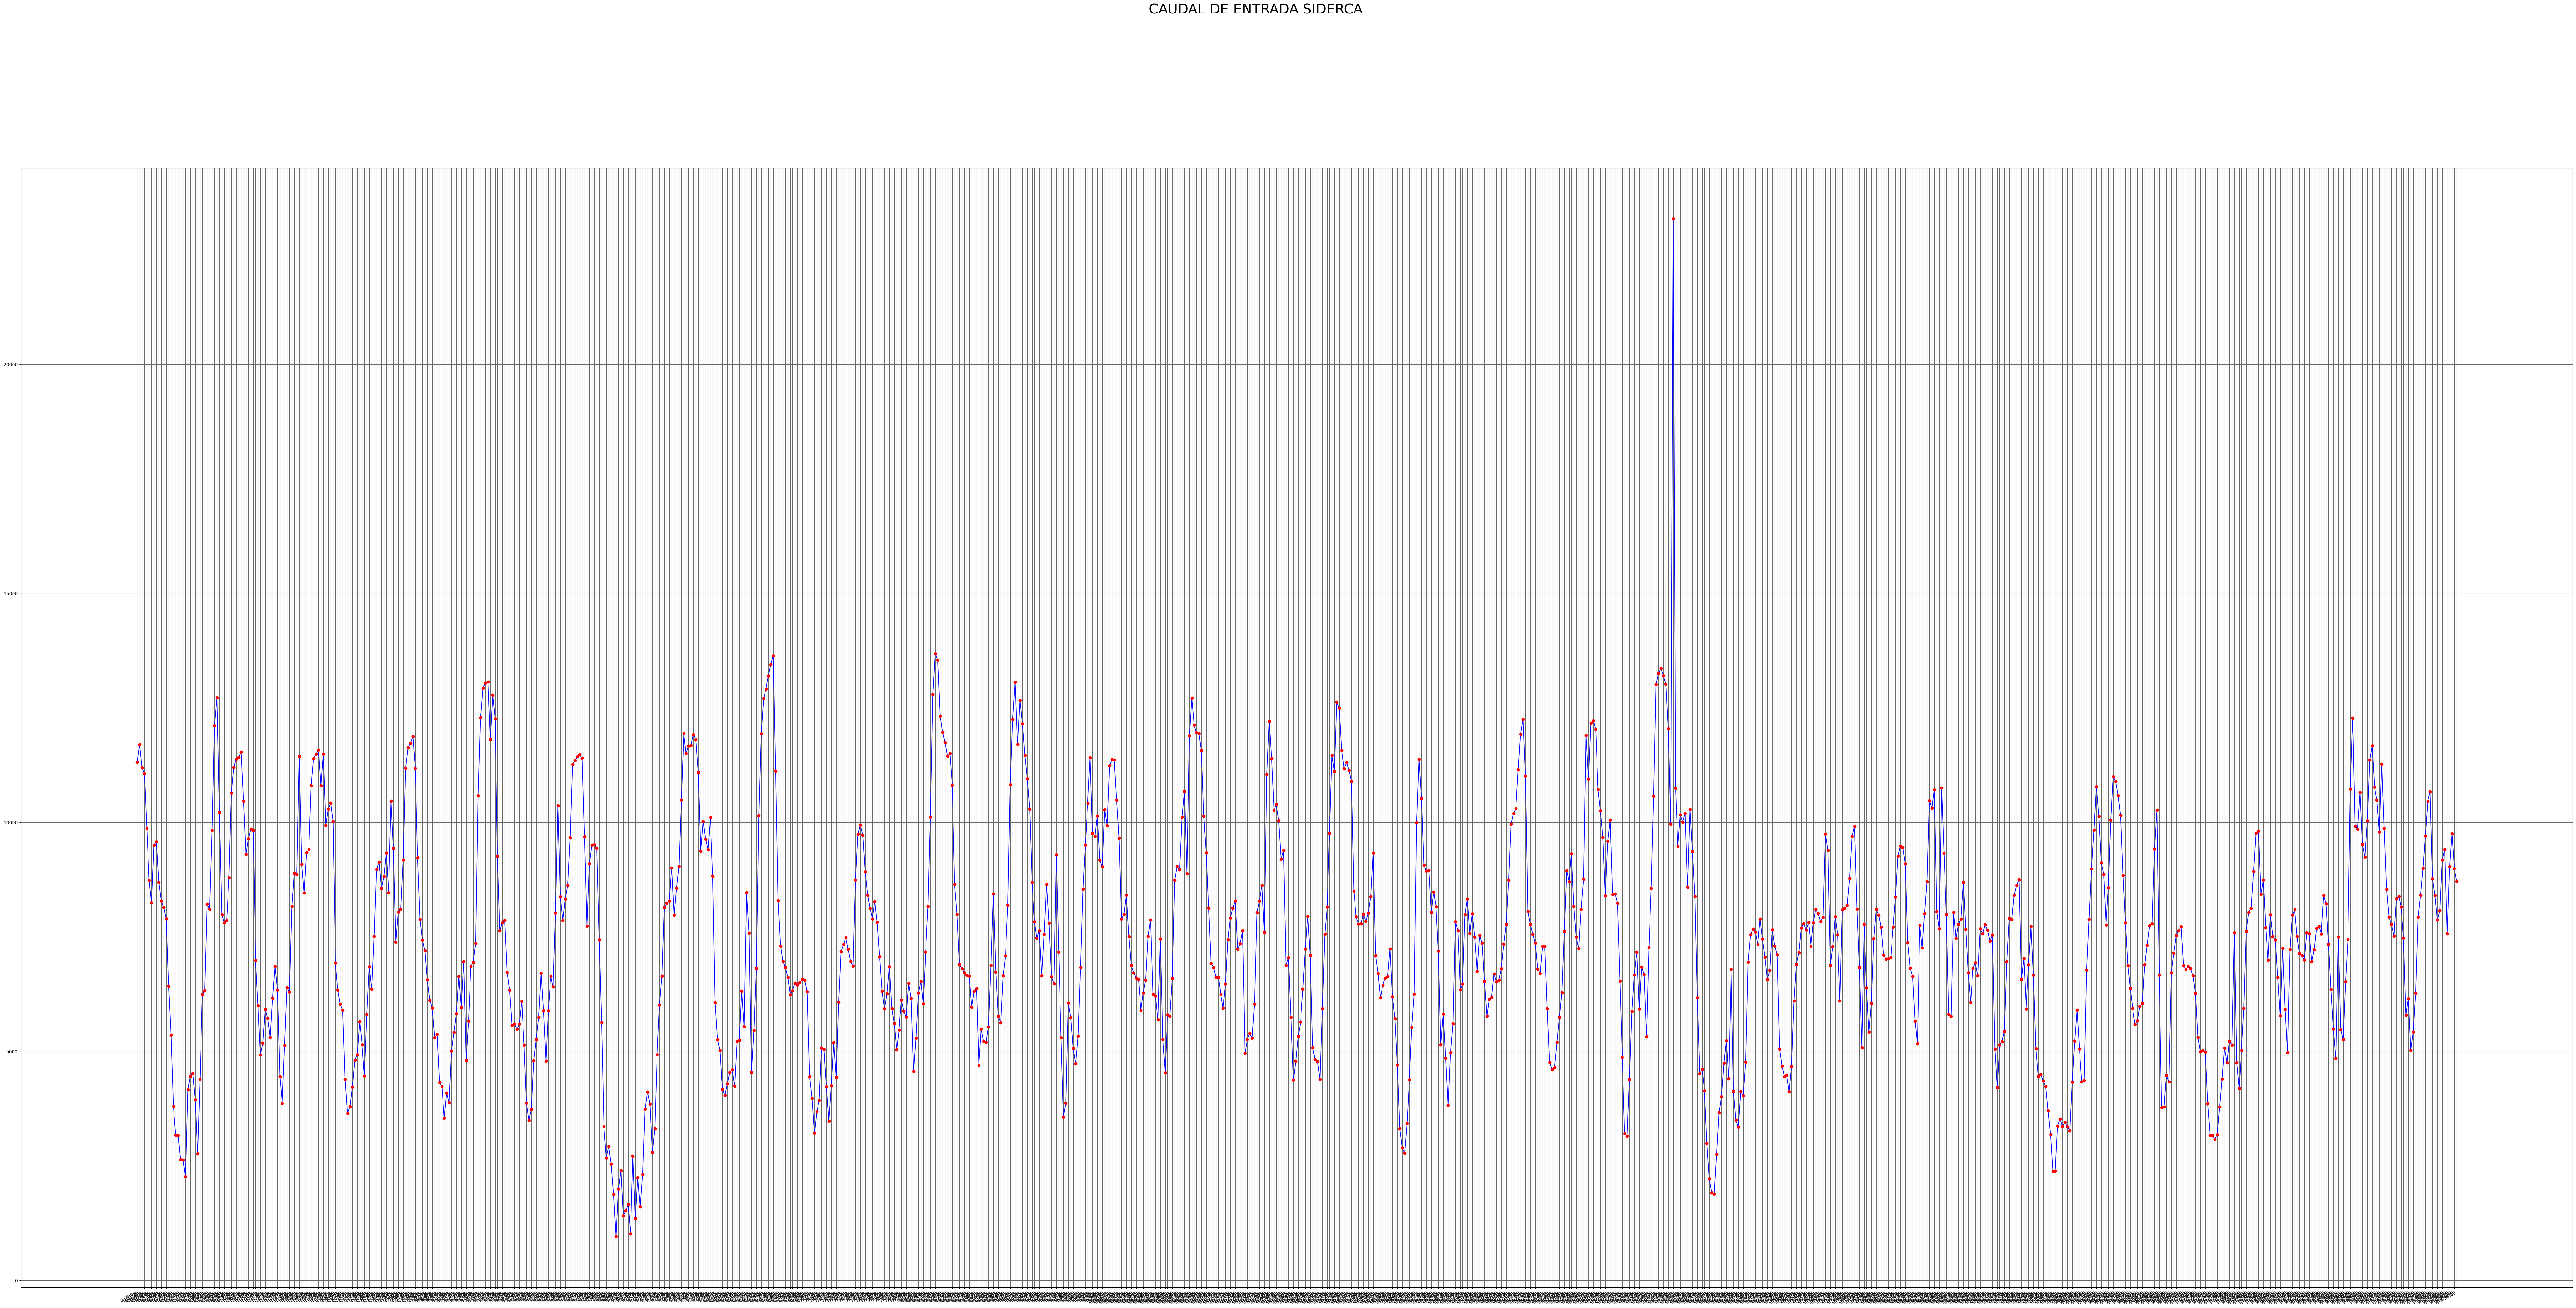

In [51]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Cursor
fig, ax = plt.subplots(1, figsize=(100,50),dpi=100)
fig.suptitle('CAUDAL DE ENTRADA SIDERCA',fontsize=30)
q=df.FQI161
x=df.Time
ax.plot(x,q ,color="Blue",label="FQI_161 entrada")
p,=ax.plot(x,q,'o',color="red")
plt.grid(visible=True,which='major',color='#666666',linestyle='-')
fig.autofmt_xdate()
plt.show()
